# Homework Assignment 1 - (Question 4)

## <u>Case Study</u>: 2016 U.S. Presidential Elections County Clusters


### Dataset Background

The dataset that we will be examining is comprised of U.S. counties that cast more than a total of 100 votes towards all candidates in the 2016 presidential *primary* elections.

While there were more than 5 candidates in the 2016 presidential primary elections, this dataset is comprised of the 5 candidates who had the highest total percentages of votes of all of these counties:

* **Democrats**:
    - Hillary Clinton
    - Bernie Sanders
* **Republicans**:
    - Ted Cruz
    - John Kasich
    - Donald Trump
    
*For reference (but not important to this analysis)*:
 * *Democrat candidates only competed with other Democrat candidates to win the Democratic party primary nomination*
 * *Republican candidates only competed with other Republican candidates to win the Republican party primary nomination*

Each row in this dataframe shows the percentage of county votes that went to each of these 5 candidate in their respective primary that they were competing in.


### Research Questions

In this analysis we would like to answer the following questions about the dataset.
1. Is this dataset clusterable?
2. If so, how many clusters are there in the dataset?
3. What kind of candidates did the counties in each cluster prefer and not prefer?

<hr>



### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline
from sklearn.cluster import KMeans

### 4.1. Read the csv [0.5 pt]
Read the reduced_2016_primary_data.csv into a dataframe. Call it df.

In [2]:
df=pd.read_csv('reduced_2016_primary_data.csv')

### 4.2. Examining the dataframe. [0.5 pt]

Show the first five rows of the dataframe df.

In [3]:
df.head()

,Bernie_Sanders,Hillary_Clinton,Donald_Trump,Ted_Cruz,John_Kasich
0,17.0,81.8,36.9,23.9,4.3
1,53.4,44.6,57.9,9.9,14.2
2,31.4,53.7,44.5,38.2,3.4
3,27.4,72.0,47.9,15.9,4.9
4,46.8,52.8,28.2,8.7,32.5


### 4.3. Describing each numerical variable in the dataframe. [2 pt]

Create a histogram for each of the five candidates in the dataset.

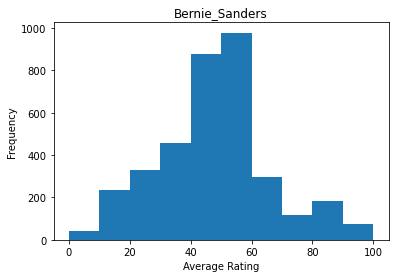

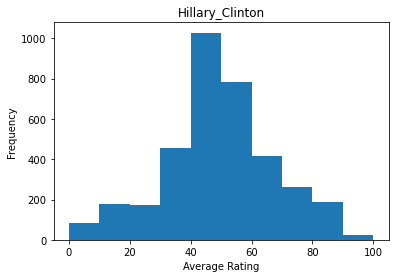

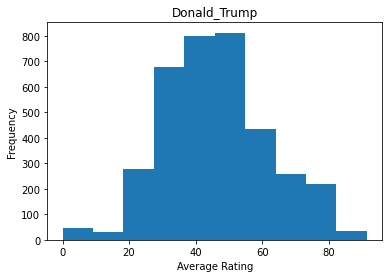

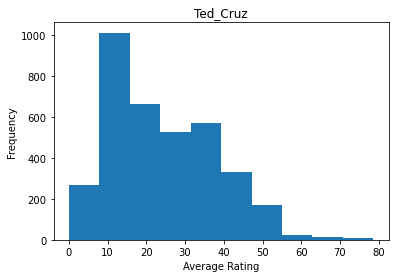

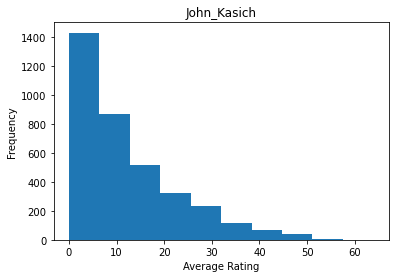

In [4]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel('Average Rating')
    plt.ylabel('Frequency')
    plt.show()



### 4.4. Describing the relationship between each pair numerical variable in the dataframe. [2 pt]

For each pair of numerical variables in this dataframe, plot a scatterplot.

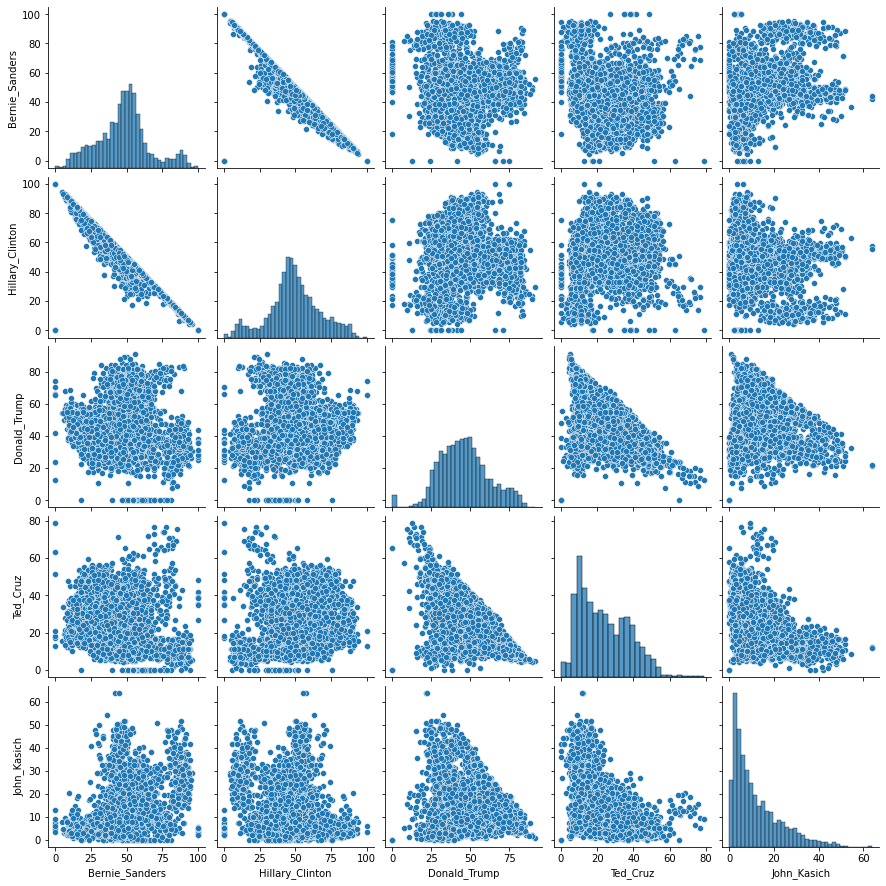

In [6]:
figout=sns.pairplot(df)
plt.show()

### 4.5. Dataset for clustering [1 pt]

Create a copy of this **df** dataframe and call it **X**.

In [7]:
X=df.copy()

### 4.6. Create an elbow plot for this dataframe X. [2 pt]

Create an k-means elbow plot for this dataframe X.
* Your elbow plot should consider clusterings with k=1, k=2, ..., k=19 clusters
* For each k, your elbow plot should find the average inertia of 3 trial clusterings

-----------
Clusterings with k= 1 Clusters
Inertia: 4384523.259636265
Inertia: 4384523.259636265
Inertia: 4384523.259636265
Average Inertia: 4384523.259636265
-----------
Clusterings with k= 2 Clusters
Inertia: 2918065.26567168
Inertia: 2918036.823460545
Inertia: 2918034.1474680034
Average Inertia: 2918045.412200076
-----------
Clusterings with k= 3 Clusters
Inertia: 2202056.5956169474
Inertia: 2202057.9655947853
Inertia: 2202042.5287847524
Average Inertia: 2202052.3633321617
-----------
Clusterings with k= 4 Clusters
Inertia: 1670671.205033292
Inertia: 1670671.205033292
Inertia: 1670687.5830489704
Average Inertia: 1670676.6643718516
-----------
Clusterings with k= 5 Clusters
Inertia: 1438723.4005200018
Inertia: 1438723.4005200018
Inertia: 1438769.1742102124
Average Inertia: 1438738.6584167387
-----------
Clusterings with k= 6 Clusters
Inertia: 1279288.7443938327
Inertia: 1279288.7443938325
Inertia: 1279288.7443938325
Average Inertia: 1279288.7443938325
-----------
Clusterings with k= 

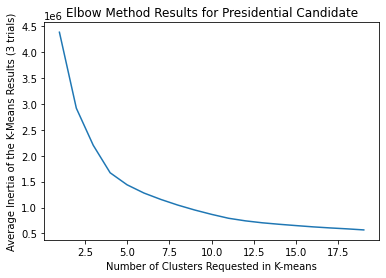

In [10]:
import warnings
warnings.filterwarnings("ignore")

avg_inertia_list=[]
for k in range(1,20):
    print('-----------')
    print('Clusterings with k= '+str(k)+' Clusters')
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(X)
        sub_inertia_list.append(kmeans.inertia_)
        print('Inertia: '+str(kmeans.inertia_))
    avg_inertia_list.append(np.average(sub_inertia_list))
    print('Average Inertia: '+str(np.average(sub_inertia_list)))
    
    
    
plt.plot(range(1,20),avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Presidential Candidate')
plt.show()

### 4.7. Does this elbow plot suggest that the dataset is *highly* clusterable by k-means? Explain. [1 pt]

No, the elbow plot does not suggest that the dataset is highly clusterable by k-means. This is because we do not a see a dramatic elbow in the plot and therefore it tells us that there is not really a clear clustering structure in the dataset and that k-means is not capable of identifying that.


### 4.8. How many clusters does this elbow plot suggest we should use in k-means? Explain. [1 pt]
*Subjective: As long as your explain yourself and the logic is correct then you will get full credit.*

Based on the elbow plot, we can see that it sort of levels off at between 2.5 and 5, so I would say k=3 clusters to use in k-means.

### 4.9. Cluster the data [2 pt]

Using the cluster number that you selected in question above, clusters the dataframe using k-means.

**<u>Note</u>: In sklearn, you can set a random seed for non-deterministic functions by using the random_state parameter. Within your KMeans() function in this problem, you should set an additional parameter with <u>random_state=100</u>.**

Save the cluster labels of your final clustering in a new column of the **df** dataframe called 'predicted_cluster'.



In [18]:
random_state = 100

kmeans=KMeans(n_clusters=3).fit(X)
df['predicted_cluster']=kmeans.labels_
df.head()

,Bernie_Sanders,Hillary_Clinton,Donald_Trump,Ted_Cruz,John_Kasich,predicted_cluster
0,17.0,81.8,36.9,23.9,4.3,1
1,53.4,44.6,57.9,9.9,14.2,0
2,31.4,53.7,44.5,38.2,3.4,1
3,27.4,72.0,47.9,15.9,4.9,1
4,46.8,52.8,28.2,8.7,32.5,0


### 4.10 Create side-by-side boxplots visualizations. [3 pt]

For each of the five candidates create a side-by-side boxplots visualization. Within each visualization, there should be a boxplot that corresponds to each predicted_cluster label.

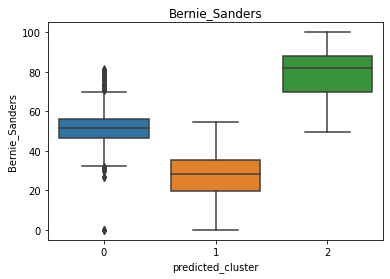

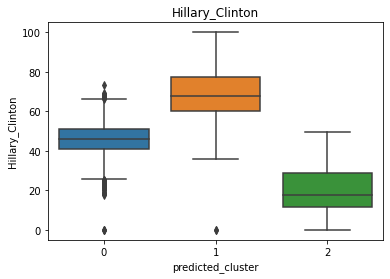

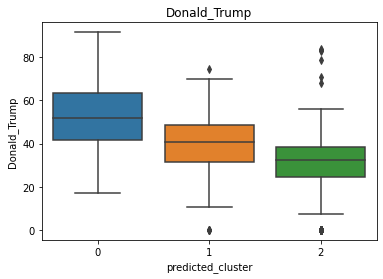

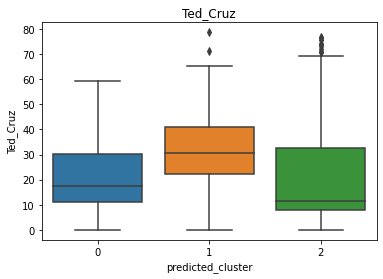

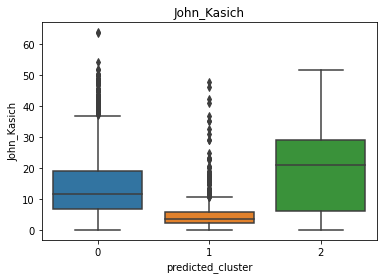

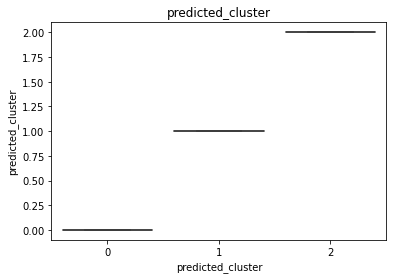

In [19]:
for col in df.columns:
    sns.boxplot(x='predicted_cluster', y=col, data=df)
    plt.title(col)
    plt.show()

### 4.11. Describing the clusters [2 pt]

Finally, let's describe what distinguishes these clusters. For each cluster answer the following questions.
* Did this cluster have the highest preference for a particular candidate(s) (compared to the other clusters)? If so, which candidate(s)?
* Did this cluster have the lowest preference for a particular candidate(s) (compared to the other clusters)? If so, which candidate(s)?

Cluster 1 has the highest preference for Donald Trump than other clusters, and upon further examination it is in moderate stance based on preference for the other candidates. For cluster 2, it has the highest preference for Hillary Clinton and the lowest preference for Bernie Sanders compared to other clusters in the same category. Cluster 2 has the highest preference for liberal Bernie Sanders and moderate John Kasich, but has the lowest preference for Republicans Donald Trump and Ted Cruz, suggesting that this cluster might be very liberal.